<a href="https://colab.research.google.com/github/NadiaCarvalho/Audio-Collabs/blob/main/MIDI_Markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, install all needed dependencies: Musescore and Lilypond software to see musical scores and pygame to listen to midi.



In [ ]:
# Instalação das Dependências
print('A instalar dependências...')

# Temos que instalar o Musescore e o Lilypond, software de notação musical, para
# podermos ver 
!apt-get update && apt-get install musescore lilypond

%env QT_QPA_PLATFORM=offscreen

A instalar dependências...
Extracting templates from packages: 100%
Preconfiguring packages ...
Selecting previously unselected package fonts-droid-fallback.
(Reading database ... 146374 files and directories currently installed.)
Preparing to unpack .../000-fonts-droid-fallback_1%3a6.0.1r16-1.1_all.deb ...
Unpacking fonts-droid-fallback (1:6.0.1r16-1.1) ...
Selecting previously unselected package libdaemon0:amd64.
Preparing to unpack .../001-libdaemon0_0.14-6_amd64.deb ...
Unpacking libdaemon0:amd64 (0.14-6) ...
Selecting previously unselected package libqt5svg5:amd64.
Preparing to unpack .../002-libqt5svg5_5.9.5-0ubuntu1_amd64.deb ...
Unpacking libqt5svg5:amd64 (5.9.5-0ubuntu1) ...
Selecting previously unselected package libcap2-bin.
Preparing to unpack .../003-libcap2-bin_1%3a2.25-1.2_amd64.deb ...
Unpacking libcap2-bin (1:2.25-1.2) ...
Selecting previously unselected package libgstreamer1.0-0:amd64.
Preparing to unpack .../004-libgstreamer1.0-0_1.14.5-0ubuntu1~18.04.1_amd64.deb ...

In [ ]:
import music21

env = music21.environment.Environment()
env['lilypondPath'] = '/usr/local/bin/lilypond'

env['pdfPath'] = '/usr/bin/musescore'
env['graphicsPath'] = '/usr/bin/musescore'

env['musicxmlPath'] = '/usr/bin/musescore'
env['musescoreDirectPNGPath'] = '/usr/bin/musescore'

Configuração das Variáveis de Ambiente:
lilypond:  /usr/local/bin/lilypond
musicXML:  /usr/bin/musescore
musescore:  /usr/bin/musescore


Then, load a score.

In [ ]:
print('Importar uma música em formato MIDI e converter no formato da biblioteca music21, uma Stream')
musica = music21.converter.parse('')

print('Visualizar a música como partitura:\n\n')
musica.show()

print('\n\nVisualizar a música como Piano Roll:\n\n')
musica.plot('pianoroll')

print('\n\nVisualizar a música como Texto:\n\n')
musica.plot('text')

Importar uma música em formato MIDI e converter no formato da biblioteca music21, uma Stream


NameError: ignored

Get a list of pitches in the music

In [ ]:
# Recuperar as notas da stream do music21 como elementos da classe nota
notes = musica.flat.notes
print(notes)

# Transformar esses elementos numa lista de strings com o nome e altura da nota
notas_originais = [note.nameWithOctave for note in notes]
print(notas_originais)

NameError: ignored

Now, we will create a Markov Chain from this sequence and generate new musical sequences!

In [ ]:
notas_unicas = list(set(notas_originais))

# Criamos uma lista de todos os possíveis arranjos de notas duas a duas
bigramas = [note + ' ' + notas_originais[i+1] for i, note in enumerate(notas_originais[:-1])]
print(bigramas)

cadeia_de_markov = {}

for nota in notas_unicas:
  bigrams_nota = [bigram for bigram in bigramas if bigram.split(' ')[0] == nota]

  # Calculo da frequencia dos bigramas
  frequencias = {x : bigrams_nota.count(x) for x in bigrams_nota}

  # Converter frequencias em Probabilidade
  probs = {x.split(' ')[1] : frequencias[x]/len(bigrams_nota) for x in frequencias}

  cadeia_de_markov[nota] = probs

['G4 G4', 'G4 A4', 'A4 G4', 'G4 C5', 'C5 B4', 'B4 G4', 'G4 G4', 'G4 A4', 'A4 G4', 'G4 D5', 'D5 C5', 'C5 G4', 'G4 G4', 'G4 G5', 'G5 E5', 'E5 C5', 'C5 C5', 'C5 B4', 'B4 A4', 'A4 F5', 'F5 F5', 'F5 E5', 'E5 C5', 'C5 D5', 'D5 C5']


In [ ]:
# Na geração, utilizamos a função de previsao_prox_estado a cada iteração da nova sequencia
import numpy

num_notas = 10

# Geramos uma nota inicial aleatoria das existentes na musica
nota = numpy.random.choice(notas_originais) 

sequencia_gerada = [nota]
for n in range(num_notas):
  opcoes = list(cadeia_de_markov[nota].keys())
  probabilidades = list(cadeia_de_markov[nota].values())
  nova_nota = numpy.random.choice(opcoes, p=probabilidades)

  sequencia_gerada.append(nova_nota)
  nota = nova_nota

print(sequencia_gerada)

['C5', 'D5', 'C5', 'D5', 'C5', 'C5', 'C5', 'B4', 'G4', 'D5', 'C5']


The sequence generated is a string with pitches and durations. We need to convert it into a music21 stream to see it as a score. 

Visualizar a nova música como partitura:




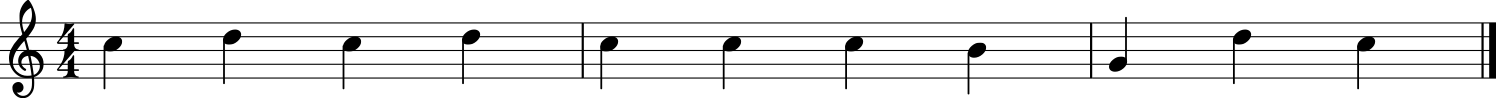



Visualizar a música como Piano Roll:




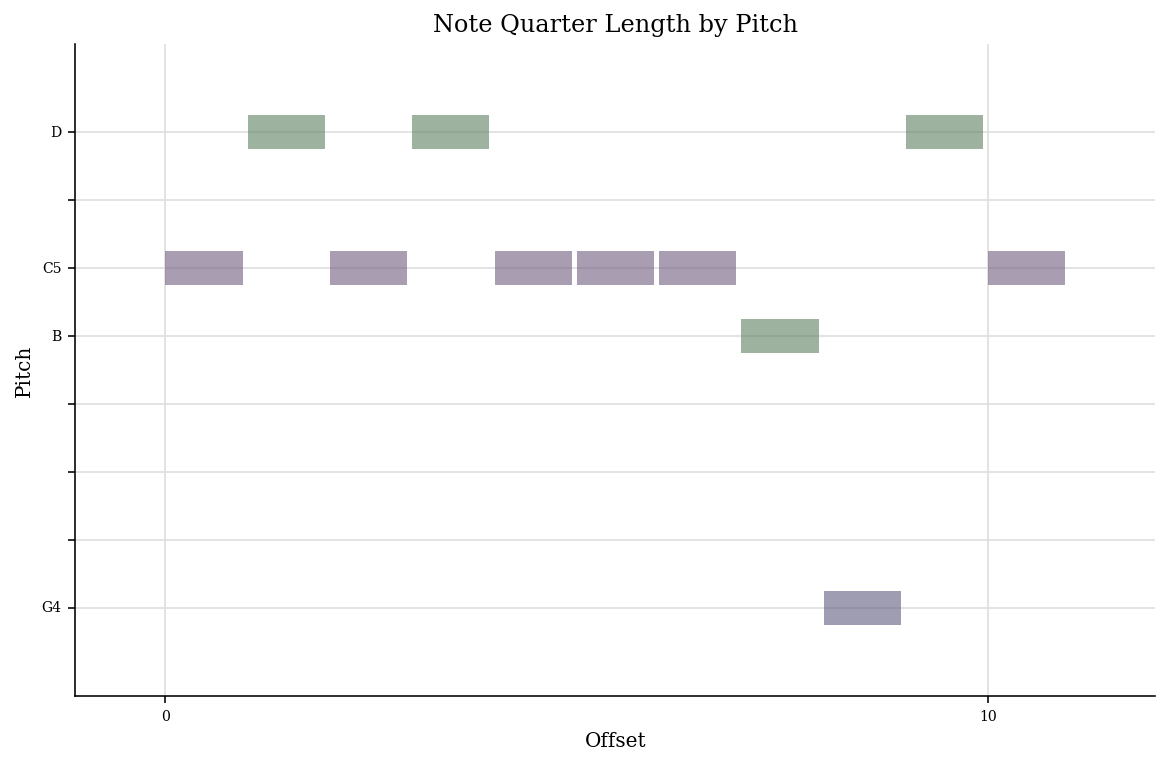

In [ ]:
# Transform Pitch Sequence into music21 Stream

nova_musica = music21.stream.Stream()

for nota in sequencia_gerada:
  # create new note and append it to the stream
  nova_nota = music21.note.Note(nota)
  nova_musica.append(nova_nota)

print('Visualizar a nova música como partitura:\n\n')
nova_musica.show()

print('\n\nVisualizar a música como Piano Roll:\n\n')
nova_musica.plot('pianoroll')